In [1]:
%cd ../

/Users/macos/Uni/Thesis


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau

In [3]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

In [5]:
path = "/Users/macos/Library/CloudStorage/OneDrive-UniversityofHelsinki/Thesis/running_results.xlsx"

df_raw = pd.read_excel(path, header=1)

df_raw.head()

,model_name,dataset,use_cutoff,loss,val_ndcg@10,val_precision@10,val_recall@10,val_mrr@10,val_hit@10,val_map@10,test_ndcg@10,test_precision@10,test_recall@10,test_mrr@10,test_hit@10,test_map@10
0,NPE,ml-1m,True,BPR,0.0203,0.0047,0.0470,0.0125,0.0470,0.0125,0.0087,0.0023,0.0227,0.0046,0.0227,0.0046
1,NPE,ml-1m,True,CE,0.0365,0.0080,0.0795,0.0237,0.0795,0.0237,0.0062,0.0016,0.0160,0.0033,0.0160,0.0033
2,NPE,ml-1m,False,BPR,0.0220,0.0052,0.0518,0.0132,0.0518,0.0132,0.0174,0.0042,0.0417,0.0102,0.0417,0.0102
3,NPE,ml-1m,False,CE,0.0341,0.0077,0.0775,0.0213,0.0775,0.0213,0.0317,0.0071,0.0705,0.0202,0.0705,0.0202
4,BERT4Rec,ml-1m,True,BPR,0.0843,0.0172,0.1718,0.0580,0.1718,0.0580,0.0151,0.0035,0.0353,0.0091,0.0353,0.0091


In [6]:
cols = ['model_name', 'dataset', 'use_cutoff', 'test_ndcg@10']

df = df_raw[
    (df_raw['loss'] == 'CE') 
    & (df_raw['dataset'].isin(['ml-1m', 'amazon-digital-music']))
][cols]

df.head()

,model_name,dataset,use_cutoff,test_ndcg@10
1,NPE,ml-1m,True,0.0062
3,NPE,ml-1m,False,0.0317
5,BERT4Rec,ml-1m,True,0.0172
7,BERT4Rec,ml-1m,False,0.1613
9,GRU4Rec,ml-1m,True,0.0132


In [7]:
results = []

for dataset in ['ml-1m', 'amazon-digital-music']:
    df_each = df[df['dataset'] == dataset]

    ndcg_use_cutoff = df_each[df_each['use_cutoff']]['test_ndcg@10']
    ndcg_not_use_cutoff = df_each[~df_each['use_cutoff']]['test_ndcg@10']

    tau = kendalltau(ndcg_use_cutoff, ndcg_not_use_cutoff).statistic

    results.append({'dataset': dataset, 'kendall_tau': tau})

df_results = pd.DataFrame.from_records(results)

df_results.head()

,dataset,kendall_tau
0,ml-1m,0.666667
1,amazon-digital-music,0.547723


Text(0.5, 1.0, "Kendall's tau between simulated online evaluation \n and leave-one-out of 4 models on 2 datasets")

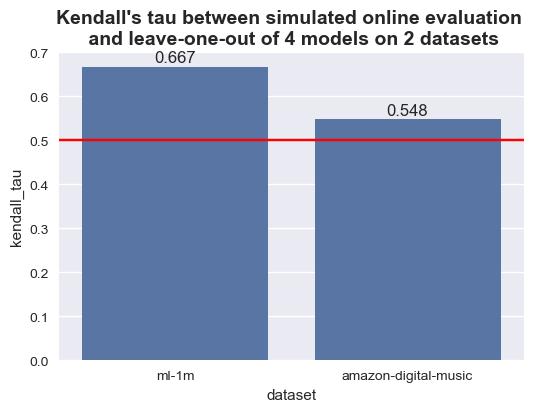

In [13]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

sns.barplot(df_results, x='dataset', y='kendall_tau', ax=ax)
for i in range(len(df_results)):
    plt.text(
        i, 
        df_results.iloc[i]['kendall_tau'] + 0.01, 
        f"{df_results.iloc[i]['kendall_tau']:.3f}", 
        ha = 'center',
        fontsize=12,
    )
ax.axhline(y = 0.5, color = 'r', linestyle = '-')
ax.set_title("Kendall's tau between simulated online evaluation \n and leave-one-out of 4 models on 2 datasets", fontweight='bold', fontsize=14)